In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Read the data

In [4]:
data = pd.read_csv('boat_data.csv')
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


### convert price into USD 

In [3]:
def convert_into_usd(x):
    exchange_rate_based_usd = {"USD":1,"Â£":0.751,"AED":3.67,"AFN":94.22,"ALL":107.71,"AMD":481.64,"ANG":1.79,"AOA":584.25,"ARS":100.66,"AUD":1.4,"AWG":1.79,"AZN":1.7,"BAM":1.73,"BBD":2,"BDT":85.73,"BGN":1.73,"BHD":0.376,"BIF":1988.2,"BMD":1,"BND":1.37,"BOB":6.88,"BRL":5.62,"BSD":1,"BTN":75.26,"BWP":11.78,"BYN":2.54,"BZD":2,"CAD":1.27,"CDF":1998.82,"CHF":0.924,"CLP":831.29,"CNY":6.39,"COP":3965.28,"CRC":635.55,"CUC":1,"CUP":25,"CVE":97.74,"CZK":22.76,"DJF":177.72,"DKK":6.61,"DOP":56.5,"DZD":138.93,"EGP":15.71,"ERN":15,"ETB":48.12,"EUR":0.886,"FJD":2.12,"FKP":0.751,"FOK":6.61,"GBP":0.751,"GEL":3.1,"GGP":0.751,"GHS":6.12,"GIP":0.751,"GMD":52.62,"GNF":9536.72,"GTQ":7.73,"GYD":209.01,"HKD":7.8,"HNL":24.09,"HRK":6.68,"HTG":98.83,"HUF":326.86,"IDR":14280.09,"ILS":3.18,"IMP":0.751,"INR":75.27,"IQD":1457.69,"IRR":41998.73,"ISK":130.18,"JMD":155.84,"JOD":0.709,"JPY":113.61,"KES":112.37,"KGS":84.75,"KHR":4061.93,"KID":1.4,"KMF":436.09,"KRW":1191.68,"KWD":0.3,"KYD":0.833,"KZT":434.6,"LAK":10794.8,"LBP":1507.5,"LKR":201.76,"LRD":142.62,"LSL":16.15,"LYD":4.61,"MAD":9.24,"MDL":17.74,"MGA":3981.83,"MKD":54.73,"MMK":1780.82,"MNT":2846.68,"MOP":8.03,"MRU":36.21,"MUR":43.43,"MVR":15.4,"MWK":815.14,"MXN":21.77,"MYR":4.23,"MZN":64,"NAD":16.15,"NGN":422.32,"NIO":35.2,"NOK":9.05,"NPR":120.42,"NZD":1.47,"OMR":0.384,"PAB":1,"PEN":4.03,"PGK":3.53,"PHP":50.39,"PKR":175.58,"PLN":4.16,"PYG":6856.91,"QAR":3.64,"RON":4.38,"RSD":104.48,"RUB":74.91,"RWF":1034.48,"SAR":3.75,"SBD":8,"SCR":13.66,"SDG":438.69,"SEK":9.1,"SGD":1.37,"SHP":0.751,"SLL":10967.22,"SOS":577.94,"SRD":21.53,"SSP":311.53,"STN":21.72,"SYP":2503.75,"SZL":16.15,"THB":33.73,"TJS":11.26,"TMT":3.5,"TND":2.89,"TOP":2.27,"TRY":12.45,"TTD":6.76,"TVD":1.4,"TWD":27.79,"TZS":2299.73,"UAH":27.14,"UGX":3562.1,"UYU":44.01,"UZS":10766.81,"VES":4.59,"VND":22663.33,"VUV":112.7,"WST":2.59,"XAF":581.45,"XCD":2.7,"XDR":0.714,"XOF":581.45,"XPF":105.78,"YER":250.13,"ZAR":16.15,"ZMW":17.72}
    l = x.split(" ")
    currency, amount = l[0], l[1]
    return np.round(float(amount) / exchange_rate_based_usd[currency], 2)
    
data['price_in_USD'] = data['Price'].apply(lambda x: convert_into_usd(x))

### find null values

In [4]:
data.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
price_in_USD                      0
dtype: int64

### plot lenght distribution

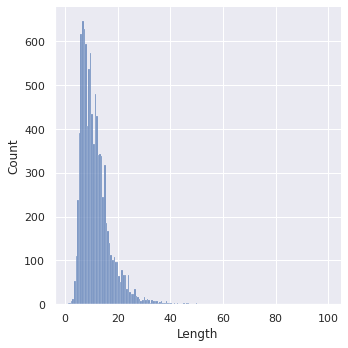

In [5]:
sns.displot(data['Length'])

### plot width distribution

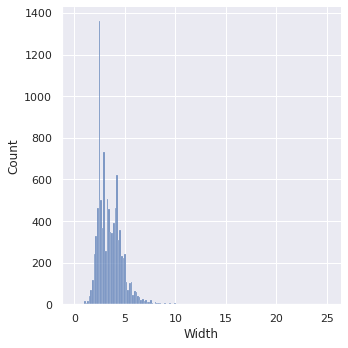

In [6]:
sns.displot(data['Width'])

### filling null width and length with there mean

In [7]:
length_mean = np.round(data['Length'].mean(), 2)
width_mean  = np.round(data['Width'].mean(), 2)

data['Length'].fillna(length_mean, inplace=True)
data['Width'].fillna(width_mean, inplace=True)

### replace Year 0 value with the most occuring year

In [8]:
data['Year Built'].replace(0, 2020, inplace=True)

### fill other null values with 'unknown'

In [9]:
data.fillna('Unknown', inplace=True)

### checking for null values

In [10]:
data.isna().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
price_in_USD                   0
dtype: int64

In [11]:
data.head(1)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_USD
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.0,1.9,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3611.47


### plot the relation between price and number of views last 7 days

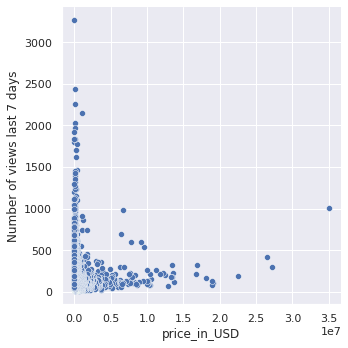

In [12]:
sns.relplot(data=data, x='price_in_USD', y='Number of views last 7 days')

### get the most viewed boats to find its characteristics 

In [13]:
most_viewed_boats = data.loc[ data['Number of views last 7 days'] > 499 ]

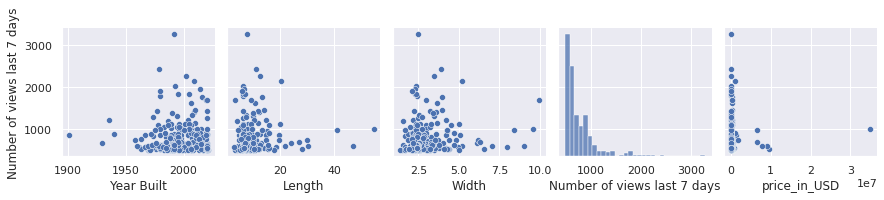

In [14]:
sns.pairplot(most_viewed_boats, y_vars=['Number of views last 7 days'])

In [15]:
c = most_viewed_boats['price_in_USD'].quantile(.95)
(most_viewed_boats["price_in_USD"] > c).sum()
c

382618.51

In [16]:
outlier = most_viewed_boats['price_in_USD'].quantile(.95)
most_viewed_boats[most_viewed_boats["price_in_USD"] < outlier].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Year Built                      1997.049430
Length                             8.109125
Width                              2.765894
Number of views last 7 days      784.144487
price_in_USD                   65238.320608
dtype: float64

In [17]:
outlier = most_viewed_boats['price_in_USD'].quantile(.95)
most_viewed_boats[most_viewed_boats["price_in_USD"] < outlier].std()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Year Built                        17.236606
Length                             2.773797
Width                              0.862164
Number of views last 7 days      359.156606
price_in_USD                   75088.118473
dtype: float64

In [18]:
most_viewed_boats['Type'].value_counts()

Used boat,Unleaded              168
Used boat,Diesel                 72
Used boat                        14
new boat from stock,Unleaded      7
new boat from stock               3
new boat on order                 3
Display Model,Unleaded            3
new boat from stock,Diesel        3
new boat on order,Diesel          2
new boat on order,Unleaded        1
Display Model,Diesel              1
Display Model                     1
Name: Type, dtype: int64

In [19]:
most_viewed_boats['Manufacturer'].value_counts()

Unknown                                     15
Sea Ray power boats                         15
Windy power boats                           11
Sunseeker power boats                       10
Bayliner power boats                        10
                                            ..
Terhi power boats                            1
Rodriguez Group (Italyachts) power boats     1
Majesty Yachts power boats                   1
Azimut power boats                           1
Lambro power boats                           1
Name: Manufacturer, Length: 119, dtype: int64

In [20]:
most_viewed_boats['Boat Type'].value_counts()

Sport Boat                                  61
Motor Yacht                                 40
Cabin Boat                                  38
Wakeboard/Wakesurf                          15
Bowrider                                     8
Classic,Runabout                             8
Classic                                      7
Flybridge                                    7
Hardtop                                      7
Fishing Boat                                 6
Mega Yacht                                   5
Runabout                                     5
Cabin Boat,Motor Yacht,Sport Boat            4
Offshore Boat                                4
Pilothouse                                   4
House Boat                                   4
Motor Yacht,Sport Boat                       4
Deck Boat                                    3
Sport Boat,Wakeboard/Wakesurf,Water ski      3
Classic,Sport Boat                           3
Cabin Boat,Motor Yacht                       3
Cabin Boat,Tr

## characteristics of the most viewed boat listings in the last 7 days

In [21]:
data.loc[ data['Number of views last 7 days'] == data['Number of views last 7 days'].nlargest(1).item() ]

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_USD
9580,CHF 14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.7,2.46,Plastic,Switzerland Â» Le Landeron (NE),3263,16125.54


## is it the most expensive boats that get the most views?
#### No on the contrary the cheepest boats that get most views.

## common features among the most viewed boats:
* year built > 1960 with mean 1997 and std 17
* lenght < 20 with mean 8.11 and std 2.77
* 2.5 < width < 5 with mean 2.77 and std 0.86
* price < 400,000$ with mean 65238 and std 75088
* the lowest the price the most viewd

### most viewed type : with respect to its number of occurrence
    * Used boat,Unleaded               168
	* Used boat,Diesel                 72
	* Used boat                        14
	* new boat from stock,Unleaded     7

### most viewed Boat Type : with respect to its number of occurrence
    * Sport Boat                                  61
	* Motor Yacht                                 40
	* Cabin Boat                                  38
	* Wakeboard/Wakesurf                          15


#### note : 
    * std --> standerd divion
    * mean --> the average of the column